## Forward Finite Difference Method

The **forward finite difference** is the simplest numerical differentiation method. It approximates the derivative by using the slope of a secant line between the current point and a point slightly ahead (forward) on the function.

### Mathematical Formula

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

Where:
- $f(x)$ is the function value at point $x$
- $f(x+h)$ is the function value at point $x+h$
- $h$ is the **step size** (a small positive number)

### Geometric Interpretation

The forward difference calculates the slope of the **secant line** connecting two points:
- Point A: $(x, f(x))$
- Point B: $(x+h, f(x+h))$

As $h$ becomes smaller, this secant line approaches the **tangent line** at point $x$, giving us a better approximation of the true derivative.

### Error Characteristics

- **Error Order**: $O(h)$ - This means the error is proportional to $h$
- **Accuracy**: If you reduce $h$ by a factor of 10, the error typically reduces by about 10 times
- **Limitation**: Very small $h$ can cause numerical precision problems

---


1) Let $f(x) = x^3$ analytically calculate $f'(0.5)$. Differentiate $f(x)$ to find the exact derivative at that point.

$$f'(x) = 3x^2$$

In [2]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

In [3]:
# Define our function and its analytical derivative
def f(x):
    return x**3

def f_prime_analytical(x):
    return 3*x**2

# Calculate the analytical derivative at x = 0.5
f_prime_analytical(0.5)

0.75

---

2) Use forward finite difference to approximate $f'(0.5)$ with $h=0.1$

In [4]:
# Try implementing the forward difference method yourself! Use h = 0.1, 0.01, and 0.001


def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

print(forward_difference(f, 0.5, 0.1))  # Should be close to 0.75
         

0.9099999999999997


---

3) Create a plot that shows:
- The **analytical derivative** $f'(x) = 3x^2$ (exact solution)
- The **forward finite difference** approximation with $h = 0.1$
- The **forward finite difference** approximation with $h = 0.001$

**Expected outcome**: You should see that the smaller step size ($h = 0.001$) gives a much better approximation to the true derivative than the larger step size ($h = 0.1$).

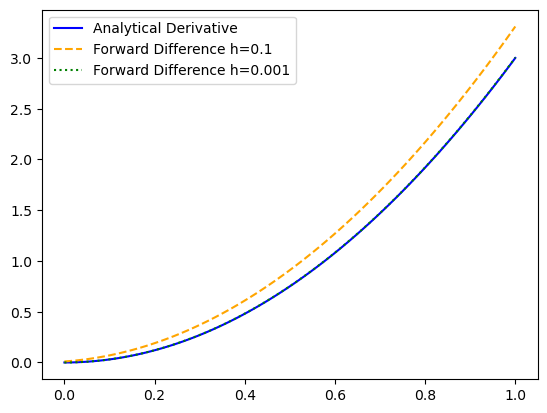

In [ ]:
# Try forward finite difference with different step sizes h = 0.1 and 0.001

# Define forward finite difference function

# Define suitable range for x with np.linspace

xs = np.linspace(0, 1, 100)

# Plot the analytical and numerical derivatives
plt.plot(xs, f_prime_analytical(xs), label='Analytical Derivative', color='blue')
plt.plot(xs, forward_difference(f, xs, 0.1), label='Forward Difference h=0.1', linestyle='--', color='orange')
plt.plot(xs, forward_difference(f, xs, 0.001), label='Forward Difference h=0.001', linestyle=':', color='green')
plt.legend()


---

## Visual Illustration of Forward Finite Difference

Let's visualize how the forward finite difference method works by plotting the function, the secant line, and the true tangent line.

At x = 0.5:
Analytical derivative: f'(0.5) = 0.750000
Forward difference (h = 0.3): 1.290000
Absolute error: |0.750000 - 1.290000| = 0.540000
Relative error: 72.00%


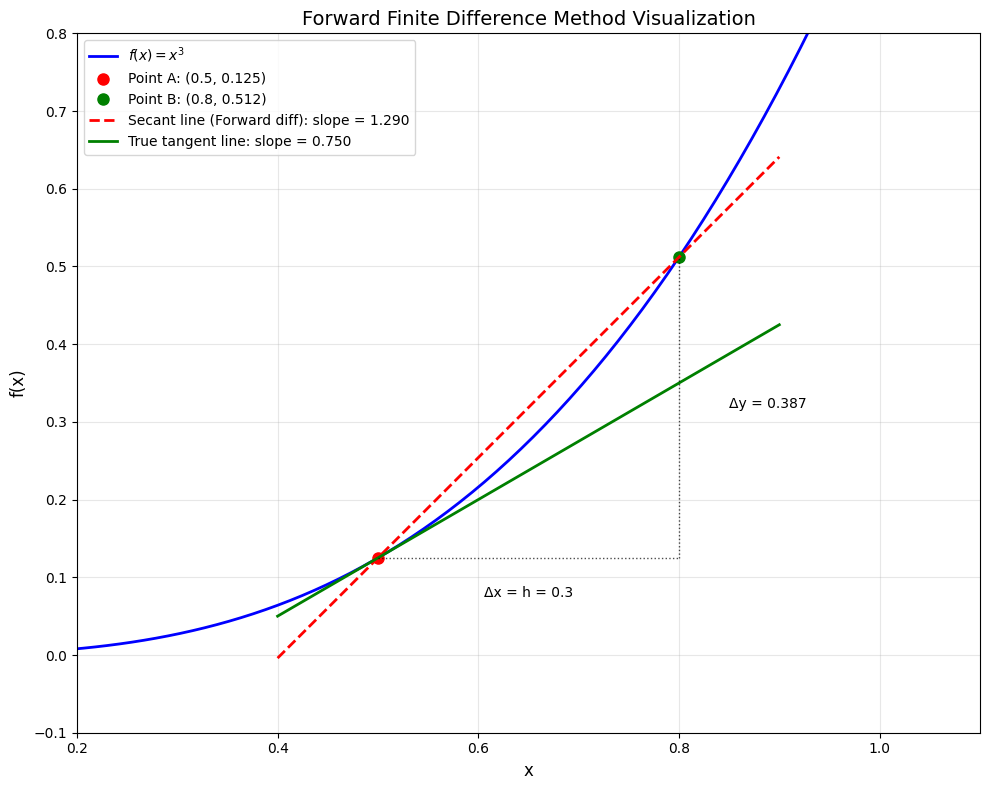

In [3]:

# Point of interest
x0 = 0.5
h = 0.3  # Step size (deliberately large for visualization)

# Calculate points
y0 = f(x0)
y1 = f(x0 + h)

# Forward difference approximation
forward_diff_approx = (y1 - y0) / h
analytical_derivative = f_prime_analytical(x0)

# Create x values for plotting the function
x_plot = np.linspace(0, 1.2, 100)
y_plot = f(x_plot)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the original function
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label=f'$f(x) = x^3$')

# Mark the two points used in forward difference
plt.plot(x0, y0, 'ro', markersize=8, label=f'Point A: ({x0}, {y0:.3f})')
plt.plot(x0 + h, y1, 'go', markersize=8, label=f'Point B: ({x0+h:.1f}, {y1:.3f})')

# Draw the secant line (forward difference approximation)
x_secant = np.linspace(x0 - 0.1, x0 + h + 0.1, 100)
y_secant = y0 + forward_diff_approx * (x_secant - x0)
plt.plot(x_secant, y_secant, 'r--', linewidth=2, 
         label=f'Secant line (Forward diff): slope = {forward_diff_approx:.3f}')

# Draw the true tangent line
x_tangent = np.linspace(x0 - 0.1, x0 + h + 0.1, 100)
y_tangent = y0 + analytical_derivative * (x_tangent - x0)
plt.plot(x_tangent, y_tangent, 'g-', linewidth=2, 
         label=f'True tangent line: slope = {analytical_derivative:.3f}')

# Add vertical and horizontal lines to show the rise and run
plt.plot([x0, x0 + h], [y0, y0], 'k:', alpha=0.7, linewidth=1)
plt.plot([x0 + h, x0 + h], [y0, y1], 'k:', alpha=0.7, linewidth=1)

# Add annotations for rise and run
plt.annotate(f'Δx = h = {h}', xy=(x0 + h/2, y0 - 0.05), ha='center', fontsize=10)
plt.annotate(f'Δy = {y1-y0:.3f}', xy=(x0 + h + 0.05, (y0 + y1)/2), ha='left', fontsize=10)

# Formatting
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Forward Finite Difference Method Visualization', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0.2, 1.1)
plt.ylim(-0.1, 0.8)

# Print the comparison
print(f"At x = {x0}:")
print(f"Analytical derivative: f'({x0}) = {analytical_derivative:.6f}")
print(f"Forward difference (h = {h}): {forward_diff_approx:.6f}")
print(f"Absolute error: |{analytical_derivative:.6f} - {forward_diff_approx:.6f}| = {abs(analytical_derivative - forward_diff_approx):.6f}")
print(f"Relative error: {abs(analytical_derivative - forward_diff_approx)/analytical_derivative*100:.2f}%")

plt.tight_layout()
plt.show()

---

## Effect of Step Size on Accuracy

Let's see how the forward finite difference approximation improves as we make the step size $h$ smaller:

Analytical derivative at x = 0.5: 0.75
------------------------------------------------------------
Step size (h)   Forward Diff    Error           Rel Error %    
------------------------------------------------------------
0.500000        1.750000        1.000000        133.33         
0.100000        0.910000        0.160000        21.33          
0.010000        0.765100        0.015100        2.01           
0.001000        0.751501        0.001501        0.20           
0.000100        0.750150        0.000150        0.02           


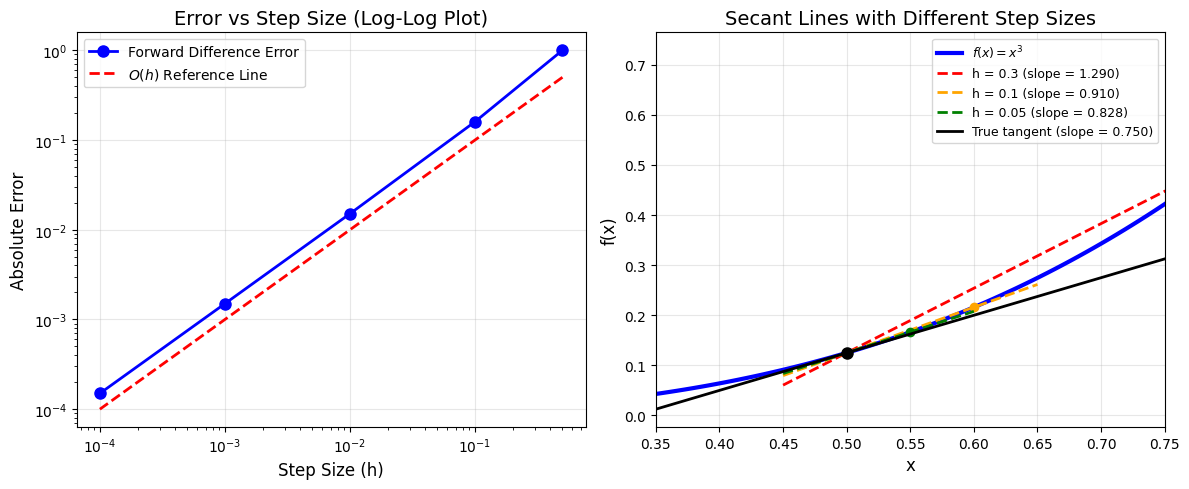

In [4]:
# Forward finite difference function
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

# Test different step sizes
x0 = 0.5
h_values = [0.5, 0.1, 0.01, 0.001, 0.0001]
analytical_value = f_prime_analytical(x0)

print(f"Analytical derivative at x = {x0}: {analytical_value}")
print("-" * 60)
print(f"{'Step size (h)':<15} {'Forward Diff':<15} {'Error':<15} {'Rel Error %':<15}")
print("-" * 60)

errors = []
for h in h_values:
    approx = forward_diff(f, x0, h)
    error = abs(analytical_value - approx)
    rel_error = (error / analytical_value) * 100
    errors.append(error)
    print(f"{h:<15.6f} {approx:<15.6f} {error:<15.6f} {rel_error:<15.2f}")

# Plot the convergence
plt.figure(figsize=(12, 5))

# Left plot: Error vs Step Size
plt.subplot(1, 2, 1)
plt.loglog(h_values, errors, 'bo-', linewidth=2, markersize=8, label='Forward Difference Error')
plt.loglog(h_values, h_values, 'r--', linewidth=2, label='$O(h)$ Reference Line')
plt.xlabel('Step Size (h)', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Error vs Step Size (Log-Log Plot)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Right plot: Visual comparison of secant lines
plt.subplot(1, 2, 2)
x_plot = np.linspace(0.3, 0.9, 100)
y_plot = f(x_plot)
plt.plot(x_plot, y_plot, 'b-', linewidth=3, label='$f(x) = x^3$')

colors = ['red', 'orange', 'green', 'purple', 'brown']
for i, h in enumerate([0.3, 0.1, 0.05]):
    y1 = f(x0 + h)
    slope = forward_diff(f, x0, h)
    x_line = np.linspace(x0 - 0.05, x0 + h + 0.05, 100)
    y_line = f(x0) + slope * (x_line - x0)
    plt.plot(x_line, y_line, '--', color=colors[i], linewidth=2, 
             label=f'h = {h} (slope = {slope:.3f})')
    plt.plot([x0, x0 + h], [f(x0), y1], 'o', color=colors[i], markersize=6)

# True tangent line
x_tangent = np.linspace(0.35, 0.75, 100)
y_tangent = f(x0) + analytical_value * (x_tangent - x0)
plt.plot(x_tangent, y_tangent, 'k-', linewidth=2, label=f'True tangent (slope = {analytical_value:.3f})')
plt.plot(x0, f(x0), 'ko', markersize=8)

plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Secant Lines with Different Step Sizes', fontsize=14)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)
plt.xlim(0.35, 0.75)

plt.tight_layout()
plt.show()